# Project: Investigate FBI Gun Data
(Note: all findings are tentative and are not conclusive as they are not backed up by Statistics or Machine Learning)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> [from Udacity] The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by [gun shops] to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn't otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

>-  The NICS data contains the number of firearm checks by month, state, and type.
- The U.S. census data contains several variables at the state level. Most variables just have one data point per state [2016], but a few have data for more than one year.

> Questions: 
1. What census data is associated with high gun per capita?
2. Which states have had the highest growth in gun registrations?
3. What is the overall trend of gun purchases?

In [1]:
# Packages used
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

> Load the FBI NICS data as 'df_gun' and the Census data as 'df_census'.
- The Census data will require a majority of the cleaning as the data needs to be transposed to make the states as rows and allow a comparison to the NICS data.
- Additionally, once transposed the Census column names need to be renamed to remove upper case characters, whitespace, and to shorten the length.

In [2]:
# Load data
df_gun = pd.read_excel('gun_data.xlsx')
df_census = pd.read_csv('U.S. Census Data.csv')

# Cleaning Up of U.S. Census Data types:
#1 - Transpose ROWS and COLUMNS
df_census = df_census.transpose().reset_index()

#2 - Set the column names to the first row [from the current interger values after the transpose]
df_census.columns=df_census.iloc[0]

#3 - Remove the first 2 rows and only keep columns 0-66 (drop the rest)
#    Reset the index
df_census = df_census.iloc[2:, :66].reset_index(drop=True)

# Rename df_census column names to appropriate values:
df_census.columns = ['state', 'pop_est_2016', 'pop_est_2010', 'pop_pct_chg_2010_to_2016', 'pop_cens_2010', 'pers_und_5_pct_2016', 'pers_und_5_pct_2010', 'pers_und_18_pct_2016', 'pers_und_18_pct_2010', 'pers_65_and_ovr_pct_2016', 'pers_65_and_ovr_pct_2010', 'fem_pers_pct_2016', 'fem_pers_pct_2010', 'wht_alone_pct_2016', 'blk_pct_2016', 'amr_ind_and_ak_nat_pct_2016', 'azn_pct_2016', 'nat_hi_and_othr_pac_isl_pct_2016', 'two_or_mo_pct_2016', 'hisp_or_lat_pct_2016', 'wht_not_hisp_or_lat_pct_2016', 'vet_2011-2015', 'forn_born_pct_2011-2015', 'housing_unt_2016', 'housing_unt_2010', 'own_occd_2011-2015', 'med_valu_own_occd_2011-2015', 'med_cost_w_mort_2011-2015', 'med_cost_wo_mort_2011-2015', 'med_rent_2011-2015', 'bld_perm_2016', 'hse_hlds_2011-2015', 'pers_per_hse_hld_2011-2015', 'same_hse_1yr_ago_pct_2011-2015', 'esl_at_hm_pct_2011-2015', 'hs_grad_or_higher_pct_2011-2015', 'bach_or_higher_pct_2011-2015', 'disab_und_65_pct_2011-2015', 'no_hcare_ins_und_65_pct', 'total_in_wkfc_pct_2011-2015', 'fem_in_wkfc_pct_2011-2015', 'total_accom_and_food_sales_2012', 'total_hcare_and_socl_assist_2012', 'total_mfr_shipmnts_2012', 'total_merch_whlslr_sales_2012', 'total_ret_sales_2012', 'total_ret_sales_per_cap_2012', 'mean_commute_2011-2015', 'mean_hse_hld_inc_2011-2015', 'per_cap_inc_2011-2015', 'in_povty_pct', 'total_emplrs_2015', 'total_emplmnt_2015', 'total_ann_payrll_2015', 'total_emplmnt_pct_chg_2014-2015', 'total_non_emplrs_2015', 'all_firms_2012', 'men_frms_2012', 'wmen_frms_2012', 'minor_frms_2012', 'non_minor_frms_2012', 'vet_frms_2012', 'non_vet_frms_2012', 'pop_per_sq_mi_2010', 'lnd_area_sq_mi_2010', 'fips_cd']

### Data Cleaning - Census
> 1. Remove quotes from the FIPS code
2. Clean and convert appropriate columns into Integers.
3. Clean and convert remaining columns into Floats.

In [3]:
# Remove Quotes("") from df_census['fips_cd']
df_census['fips_cd'] = df_census['fips_cd'].str.replace(r'\D+', '')

# Convert appropriate df_census Columns to Int
cols_to_ints = ['pop_est_2016', 'pop_est_2010', 'pop_cens_2010', 'vet_2011-2015', 'housing_unt_2016', 'housing_unt_2010', 'med_valu_own_occd_2011-2015', 'med_cost_w_mort_2011-2015', 'med_cost_wo_mort_2011-2015', 'med_rent_2011-2015', 'bld_perm_2016', 'hse_hlds_2011-2015', 'total_accom_and_food_sales_2012', 'total_hcare_and_socl_assist_2012', 'total_mfr_shipmnts_2012', 'total_merch_whlslr_sales_2012', 'total_ret_sales_2012', 'total_ret_sales_per_cap_2012', 'mean_hse_hld_inc_2011-2015', 'per_cap_inc_2011-2015', 'total_emplrs_2015', 'total_emplmnt_2015', 'total_ann_payrll_2015', 'total_non_emplrs_2015', 'all_firms_2012', 'men_frms_2012', 'wmen_frms_2012', 'minor_frms_2012', 'non_minor_frms_2012', 'vet_frms_2012', 'non_vet_frms_2012']
for col in cols_to_ints:
    df_census[col] = pd.to_numeric(df_census[col].str.replace(r'\D+', '')).fillna(0).astype(int)

# Convert appropriate df_census Columns to Float
cols_to_floats = ['pop_pct_chg_2010_to_2016', 'pers_und_5_pct_2016', 'pers_und_5_pct_2010', 'pers_und_18_pct_2016', 'pers_und_18_pct_2010', 'pers_65_and_ovr_pct_2016', 'pers_65_and_ovr_pct_2010', 'fem_pers_pct_2016', 'fem_pers_pct_2010', 'wht_alone_pct_2016', 'blk_pct_2016', 'amr_ind_and_ak_nat_pct_2016', 'azn_pct_2016', 'nat_hi_and_othr_pac_isl_pct_2016', 'two_or_mo_pct_2016', 'hisp_or_lat_pct_2016', 'wht_not_hisp_or_lat_pct_2016', 'forn_born_pct_2011-2015', 'own_occd_2011-2015', 'pers_per_hse_hld_2011-2015', 'same_hse_1yr_ago_pct_2011-2015', 'esl_at_hm_pct_2011-2015', 'hs_grad_or_higher_pct_2011-2015', 'bach_or_higher_pct_2011-2015', 'disab_und_65_pct_2011-2015', 'no_hcare_ins_und_65_pct', 'total_in_wkfc_pct_2011-2015', 'fem_in_wkfc_pct_2011-2015', 'mean_commute_2011-2015', 'in_povty_pct', 'total_emplmnt_pct_chg_2014-2015', 'pop_per_sq_mi_2010', 'lnd_area_sq_mi_2010']

# Performance improvement code provided by grader after the first submission
# Awesome improvement
def transform_float(x):
    # clean data
    x = x.replace("%", "").replace(",", ".").replace(" ", "")
    # transform types
    try:
        x = round(float(x)/100,3)
    except ValueError:
        x = float(0)
    return x

for col in cols_to_floats:
    df_census[col] = df_census[col].apply(transform_float)
#    for item in df_census[col].iteritems():
#        if '%' in item[1]:
#            df_census[col].iloc[item[0]] = str(round(float(item[1].replace('%',''))/100, 3))
#    df_census[col] = pd.to_numeric(df_census[col].str.replace(',', ''), errors='coerce').fillna(0).astype(float)

### Data Cleaning - FBI NICS
> 1. Convert month to datetime.
2. Convert appropriate columns to Integers.
3. Create a new column called 'year'.
4. Find state totals by year.
5. Last, drop 1998 and 2017 as the data is incomplete.

In [4]:
#Convert month in gun_data to datetime
df_gun['month'] = pd.to_datetime(df_gun['month'])

#Convert appropriate gun_data columns to Int
cols_to_ints = ['permit', 'permit_recheck', 'handgun', 'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other', 'totals']
for col in cols_to_ints:
    df_gun[col] = df_gun[col].fillna(0).astype(int)
    
#Create column "year" in FBI Gun Data
df_gun['year'] = df_gun['month'].map(lambda x: x.year)

#Save before groupby
df_gun_all = df_gun

#Group by Year+State to find totals
df_gun = df_gun.groupby(['year','state'], as_index=False)['totals'].sum()

#Drop 1998 and 2017 as they are incomplete
df_gun = df_gun[(df_gun.year != 1998) & (df_gun.year != 2017)]

> Create df_gun_final to show State, year, total, and percent change

In [5]:
#Create data frame of only 2010 and 2016 to align with Census data
df_gun_trunc = df_gun[(df_gun.year == 2010) | (df_gun.year == 2016)]

#View 2010 and 2016 Side-By-Side through pivot
df_gun_final = df_gun_trunc.pivot(index='state', columns='year')

#Find percent change of gun purchases in 2010 to 2016
df_gun_final['pct_chg_2010-2016'] = df_gun_trunc.pivot(index='state', columns='year').pct_change(axis=1)[('totals', 2016)]

#Rename columsns to appropriate names
df_gun_final.columns = ['guns_2010', 'guns_2016', 'guns_pct_chg_2010-2016']

### Data Combining
> Create the final DataFrame (df) which is a merge of the cleaned FBI NICS and Census data.
- Some additional fields are also created for additional analysis.

In [6]:
df = df_gun_final.merge(df_census, left_index=True, right_on='state', how='inner').set_index('state')
df['guns_prop_pop_2010'] = df['guns_2010'] / df['pop_est_2010']
df['guns_prop_pop_2016'] = df['guns_2016'] / df['pop_est_2016']
df['guns_prop_pct_chg_2010-2016'] = df[['guns_prop_pop_2010','guns_prop_pop_2016']].pct_change(axis=1)['guns_prop_pop_2016']
df['pers_und_5_pct_chg_2010-2016'] = df[['pers_und_5_pct_2010','pers_und_5_pct_2016']].pct_change(axis=1)['pers_und_5_pct_2016']
df['pers_und_18_pct_chg_2010-2016'] = df[['pers_und_18_pct_2010','pers_und_18_pct_2016']].pct_change(axis=1)['pers_und_18_pct_2016']
df['pers_65_and_ovr_pct_chg_2010-2016'] = df[['pers_65_and_ovr_pct_2010','pers_65_and_ovr_pct_2016']].pct_change(axis=1)['pers_65_and_ovr_pct_2016']
df['fem_pers_pct_chg_2010-2016'] = df[['fem_pers_pct_2010','fem_pers_pct_2016']].pct_change(axis=1)['fem_pers_pct_2016']
df['housing_unt_pct_chg_2010-2016'] = df[['housing_unt_2010','housing_unt_2016']].pct_change(axis=1)['housing_unt_2016']
df['vet_pct_2011-2015'] = df['vet_2011-2015'] / df['pop_est_2016']

In [7]:
#Reorder columns
df = df[['guns_2010','guns_2016','guns_pct_chg_2010-2016','guns_prop_pop_2010','guns_prop_pop_2016','guns_prop_pct_chg_2010-2016','pop_est_2016','pop_est_2010','pop_pct_chg_2010_to_2016','pers_und_5_pct_2010','pers_und_5_pct_2016','pers_und_5_pct_chg_2010-2016','pers_und_18_pct_2010','pers_und_18_pct_2016','pers_und_18_pct_chg_2010-2016','pers_65_and_ovr_pct_2010','pers_65_and_ovr_pct_2016','pers_65_and_ovr_pct_chg_2010-2016','fem_pers_pct_2010','fem_pers_pct_2016','fem_pers_pct_chg_2010-2016','wht_alone_pct_2016','blk_pct_2016','amr_ind_and_ak_nat_pct_2016','azn_pct_2016','nat_hi_and_othr_pac_isl_pct_2016','two_or_mo_pct_2016','hisp_or_lat_pct_2016','wht_not_hisp_or_lat_pct_2016','vet_2011-2015','vet_pct_2011-2015','forn_born_pct_2011-2015','housing_unt_2010','housing_unt_2016','housing_unt_pct_chg_2010-2016','own_occd_2011-2015','med_valu_own_occd_2011-2015','med_cost_w_mort_2011-2015','med_cost_wo_mort_2011-2015','med_rent_2011-2015','bld_perm_2016','hse_hlds_2011-2015','pers_per_hse_hld_2011-2015','same_hse_1yr_ago_pct_2011-2015','esl_at_hm_pct_2011-2015','hs_grad_or_higher_pct_2011-2015','bach_or_higher_pct_2011-2015','disab_und_65_pct_2011-2015','no_hcare_ins_und_65_pct','total_in_wkfc_pct_2011-2015','fem_in_wkfc_pct_2011-2015','total_accom_and_food_sales_2012','total_hcare_and_socl_assist_2012','total_mfr_shipmnts_2012','total_merch_whlslr_sales_2012','total_ret_sales_2012','total_ret_sales_per_cap_2012','mean_commute_2011-2015','mean_hse_hld_inc_2011-2015','per_cap_inc_2011-2015','in_povty_pct','total_emplrs_2015','total_emplmnt_2015','total_ann_payrll_2015','total_emplmnt_pct_chg_2014-2015','total_non_emplrs_2015','all_firms_2012','men_frms_2012','wmen_frms_2012','minor_frms_2012','non_minor_frms_2012','vet_frms_2012','non_vet_frms_2012','pop_per_sq_mi_2010','lnd_area_sq_mi_2010','fips_cd']]

<a id='eda'></a>
## Exploratory Data Analysis (Note: all findings are tentative and are not conclusive as they are not backed up by Statistics or Machine Learning)

### Research Question 1 - What census data is associated with high gun per capita?
> To answer this question, I decided to create a giant Correlation Matrix of all of the data to see if anything stuck out.

### Conclusions
>- From the Correlation Matrix heatmap, gun sales do not seem to be associated with age or race.
- It appears that the strongest indicators of a state having higher guns are if they also have a higher number of sales, employment, and firms.
- So, gun sales could be associated with more disposable income.

In [8]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = df.corr()

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

### Research Question 2 - Which states have had the highest growth in gun registrations?
> We previously found the percent change from 2010 to 2016 for each state, so to answer this we should need to sort on largest to smallest percent change.

### Conclusions
>- Indiana by far had the highest grow at over 300%.
- Second place was Delware with a little over 200%.

In [9]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df[['guns_2010','guns_2016','guns_pct_chg_2010-2016']].sort_values(by='guns_pct_chg_2010-2016', ascending=False).head(5)

,guns_2010,guns_2016,guns_pct_chg_2010-2016
state,,,
Indiana,345650,1436725,3.156589
Delaware,19240,59430,2.088877
California,816399,2377167,1.911771
Wisconsin,194797,561819,1.884126
Illinois,695300,1924070,1.767252


### Research Question 3 - What is the overall trend of gun purchases?
> To answer this question, we must use the original df_gun DataFrame as it has all years from 1999-2016.
- I will create a Pandas plot with x=Year and Y=Totals and check against by the mean and sum.

### Conclusions
>- Both graphs indicate there is a strong overall upward trend of gun purchases.

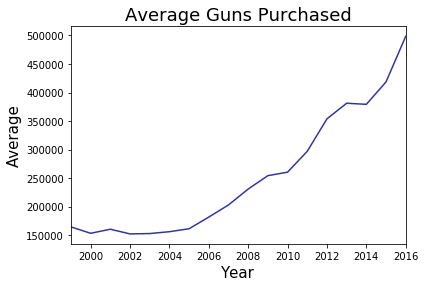

In [10]:
#Mean gun purchase by year (Obersation: Increasing)
df_gun_means = df_gun.groupby('year')['totals'].mean()
df_gun_means.plot(color='DarkBlue', alpha=0.8)
plt.title('Average Guns Purchased', fontsize=18)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average', fontsize=15);

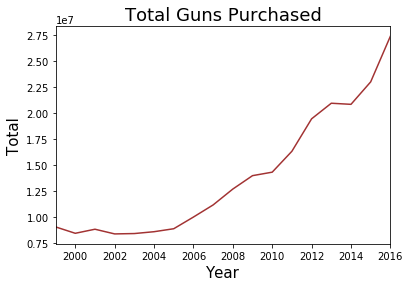

In [11]:
#Sum of gun purchases by year (Obersation: Increasing)
df_gun_totals = df_gun.groupby('year')['totals'].sum()
df_gun_totals.plot(color='DarkRed', alpha=0.8)
plt.title('Total Guns Purchased', fontsize=18)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total', fontsize=15);

### Resubmission - Additional insights through Visualizations.

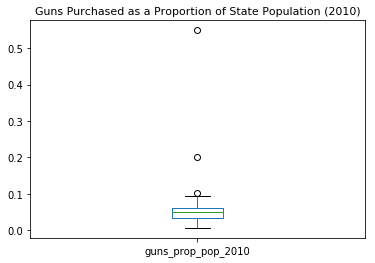

In [12]:
# plot box plots for Guns as a Proportion of the State Population in 2010
df['guns_prop_pop_2010'].plot(kind='box')
plt.title('Guns Purchased as a Proportion of State Population (2010)', fontsize=11);

In [13]:
# Show the outlier is Kentucky in 2010
df[df['guns_prop_pop_2010'] == df['guns_prop_pop_2010'].max()]

,guns_2010,guns_2016,guns_pct_chg_2010-2016,guns_prop_pop_2010,guns_prop_pop_2016,guns_prop_pct_chg_2010-2016,pop_est_2016,pop_est_2010,pop_pct_chg_2010_to_2016,pers_und_5_pct_2010,...,all_firms_2012,men_frms_2012,wmen_frms_2012,minor_frms_2012,non_minor_frms_2012,vet_frms_2012,non_vet_frms_2012,pop_per_sq_mi_2010,lnd_area_sq_mi_2010,fips_cd
state,,,,,,,,,,,,,,,,,,,,,
Kentucky,2385579,3676847,0.541281,0.549756,0.828683,0.507367,4436974,4339344,0.022,0.065,...,331546,184154,106011,27258,296155,33208,282704,1.099,0.0,21


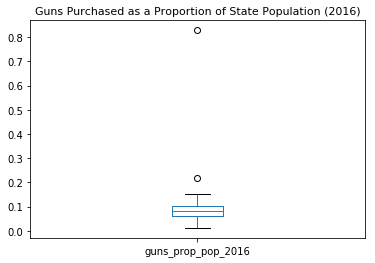

In [14]:
# plot box plots for Guns as a Proportion of the State Population in 2016
df['guns_prop_pop_2016'].plot(kind='box')
plt.title('Guns Purchased as a Proportion of State Population (2016)', fontsize=11);

In [15]:
# Show the outlier is once again Kentucky in 2016
df[df['guns_prop_pop_2016'] == df['guns_prop_pop_2016'].max()]

,guns_2010,guns_2016,guns_pct_chg_2010-2016,guns_prop_pop_2010,guns_prop_pop_2016,guns_prop_pct_chg_2010-2016,pop_est_2016,pop_est_2010,pop_pct_chg_2010_to_2016,pers_und_5_pct_2010,...,all_firms_2012,men_frms_2012,wmen_frms_2012,minor_frms_2012,non_minor_frms_2012,vet_frms_2012,non_vet_frms_2012,pop_per_sq_mi_2010,lnd_area_sq_mi_2010,fips_cd
state,,,,,,,,,,,,,,,,,,,,,
Kentucky,2385579,3676847,0.541281,0.549756,0.828683,0.507367,4436974,4339344,0.022,0.065,...,331546,184154,106011,27258,296155,33208,282704,1.099,0.0,21


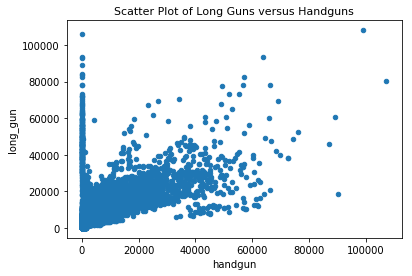

In [16]:
df_gun_all.plot(x='handgun', y='long_gun', kind='scatter');
plt.title('Scatter Plot of Long Guns versus Handguns', fontsize=11);

# Observation - the purchase of handguns is somewhat correlated with long guns (0.58094143010924326).
# The data shows the trend of either both are purchased together, or just a long gun is purchased WITHOUT a handgun.

In [17]:
#Correlation of the above data, Scatter Plot of Long Guns versus Handguns.
df_gun_all.corr()['handgun']['long_gun']

0.58094143010924326

<a id='conclusions'></a>
##### (Note: all findings are tentative and are not conclusive as they are not backed up by Statistics or Machine Learning)
## Conclusions 
My initial hypothesis was that demographic information such as age and race would strongly impact gun purchases, but the data did not support this. The strongest indicator for higher gun purchases is a strong economy through sales, employment, and employment firms. This indicates that gun purchases relate to disposable income as opposed to being considered a necessity.

## Limitations
Gun ownership (the second amendment) is one of the strongest political issues in the United States. The data analysis showed some correlation between economic factors and gun purchases, but was limited in being able to try and draw any other conclusions. In addition, although the Census data broke down demographic information, the FBI NICS data did not, making conclusions based on demographics and gun purchases difficult. Another factor missing was political party affiliation and elections as these might also impact increasing rates of gun purchases. More data points are needed to analyze what other factors influence gun purchases.

In [18]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0